In [1]:
import polars as pl
import statsmodels.api as sm

# 读取数据
data = pl.read_parquet("/Users/douboshu/Documents/大二下暑期实习/紫鑫山/Project1/dbs/data/hourly_data.pa")

df = data.sort('open_time').sort("symbol")

a = 20

df = df.with_columns([
    (pl.col('quote_volume') / pl.col('volume')).alias('vwap'),
    (pl.col('close') / pl.col('close').shift(1) - 1).alias('return'),
    pl.col('volume').rolling_mean(a).over('symbol').alias('adv')
])

df = df.with_columns([
    (-1 * pl.col('return') * pl.col('adv') * pl.col('vwap') * (pl.col('high') - pl.col('close'))).alias('alpha25')
])



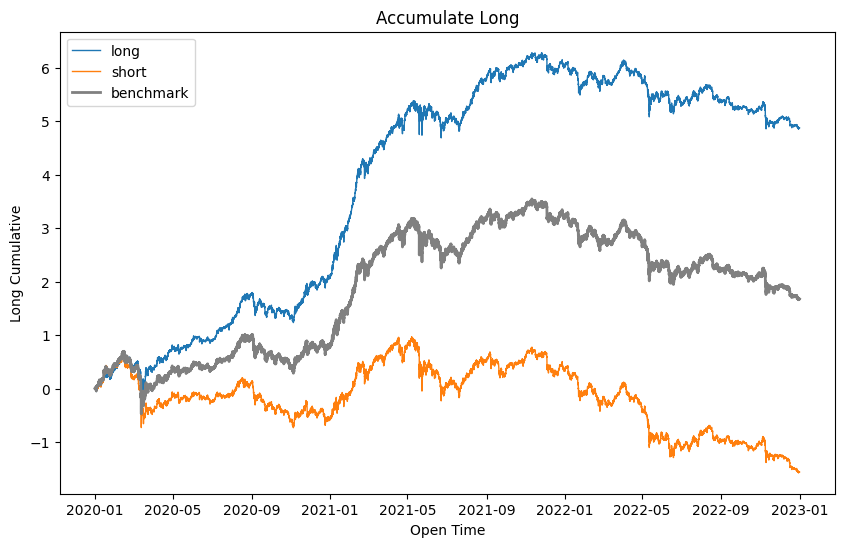

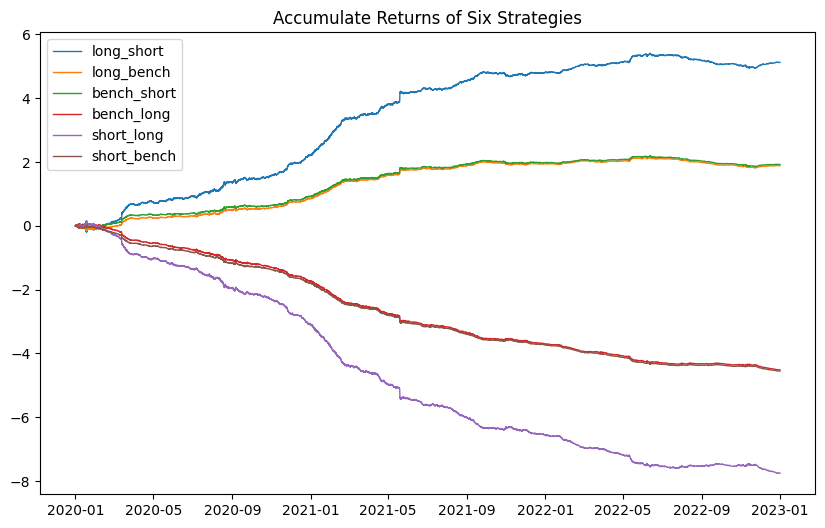

long: 
ann_return = 1.6231  sharpe = 1.4891  maxdd = 0.5929  calmar_ratio = 2.7377  

short: 
ann_return = -0.5205  sharpe = -0.4723  maxdd = 1.2913  calmar_ratio = -0.4031  

bench: 
ann_return = 0.5575  sharpe = 0.513  maxdd = 0.6895  calmar_ratio = 0.8085  

long_short: 
ann_return = 1.7056  sharpe = 5.8448  maxdd = 0.2261  calmar_ratio = 7.545  

long_bench: 
ann_return = 0.6276  sharpe = 4.2359  maxdd = 0.1532  calmar_ratio = 4.0961  

bench_long: 
ann_return = -1.5036  sharpe = -10.1482  maxdd = 4.1604  calmar_ratio = -0.3614  

short_long: 
ann_return = -2.5816  sharpe = -8.8467  maxdd = 6.8551  calmar_ratio = -0.3766  

short_bench: 
ann_return = -1.516  sharpe = -10.2162  maxdd = 4.477  calmar_ratio = -0.3386  

bench_short: 
ann_return = 0.64  sharpe = 4.3129  maxdd = 0.1189  calmar_ratio = 5.3825  



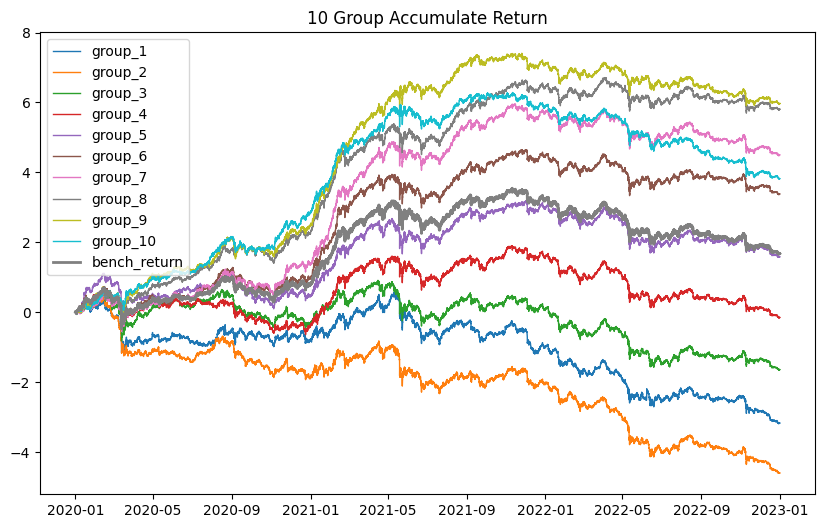

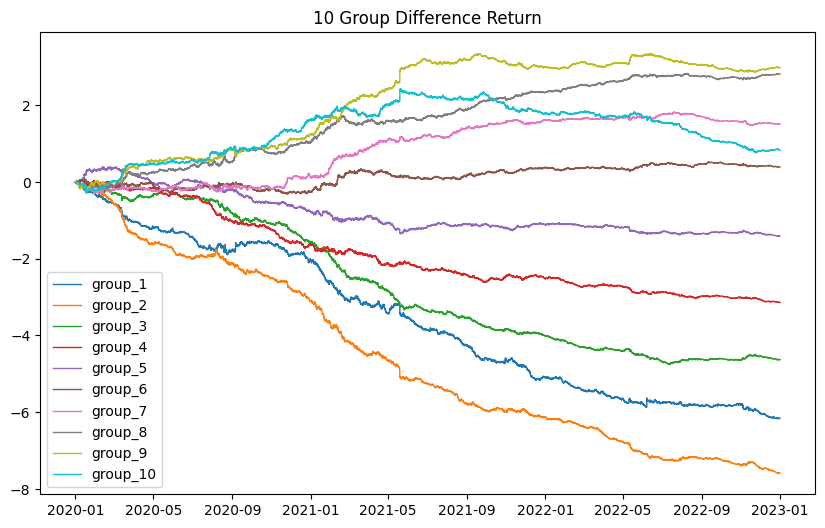

group_1: 
ann_return = -1.0559  sharpe = -0.9097  maxdd = 2.367  calmar_ratio = -0.4461  

group_2: 
ann_return = -1.5324  sharpe = -1.3167  maxdd = 3.5097  calmar_ratio = -0.4366  

group_3: 
ann_return = -0.547  sharpe = -0.4734  maxdd = 1.3423  calmar_ratio = -0.4075  

group_4: 
ann_return = -0.0505  sharpe = -0.0444  maxdd = 0.7854  calmar_ratio = -0.0643  

group_5: 
ann_return = 0.527  sharpe = 0.4541  maxdd = 0.6105  calmar_ratio = 0.8632  

group_6: 
ann_return = 1.1256  sharpe = 0.9776  maxdd = 0.6808  calmar_ratio = 1.6534  

group_7: 
ann_return = 1.499  sharpe = 1.3104  maxdd = 0.7176  calmar_ratio = 2.089  

group_8: 
ann_return = 1.9327  sharpe = 1.703  maxdd = 0.6378  calmar_ratio = 3.0301  

group_9: 
ann_return = 1.9875  sharpe = 1.7288  maxdd = 0.5739  calmar_ratio = 3.4632  

group_10: 
ann_return = 1.2717  sharpe = 1.1729  maxdd = 0.51  calmar_ratio = 2.4936  

-----------------------------------------
group_difference_1: 
ann_return = -2.0514  sharpe = -4.2833  ma

In [2]:
factors = df.select(['open_time', 'symbol', 'alpha25'])

from factor_analysis.factor_analysis import FactorAnalysis

# 使用示例
analysis = FactorAnalysis(factors, data)
analysis.run_full_analysis()